### bias variance tradeoff

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
# color setting
sample_point_color = "#929591"
sample_color = "#acc2d9"
expected_color = "#1d5dec"
true_color = "#d90166"

In [4]:
# true function
def true_func(X):
    return np.cos(1.5 * np.pi * X)

In [5]:
# data generation
np.random.seed(0)
n_samples = 100

X = np.sort(np.random.rand(n_samples))
y = true_func(X) + np.random.randn(n_samples) * 0.15

### bias func & variance func
- $\operatorname{Bias} {\big [} \hat{f}(X) {\big ]} = \operatorname{E} {\big [} \hat{f}(X) - f(X) {\big ]}$
- $\operatorname{Var} \big[ \hat{f}(X) \big] = \operatorname{E} \big[ {\big( \hat{f}(X) - \operatorname{E} [\hat{f}(X)] \big)}^2 \big] = \operatorname{E} {\big[ {\hat{f}(X)}^2 \big]}  - \operatorname{E} {\big[ \hat{f}(X) \big]}^2$

In [6]:
def bias(pred_vals, real_vals):
    maes = []
    for i in range(len(pred_vals)):
        maes.append(np.mean(np.abs(pred_vals[i] - real_vals[i])))
    return np.mean(maes)

In [7]:
def variance(pred_vals):
    vars = []
    for i in range(len(pred_vals)):
        vars.append(np.mean(pred_vals[i]**2) - np.mean(pred_vals[i])**2)
    return np.mean(vars)

### degree = 1

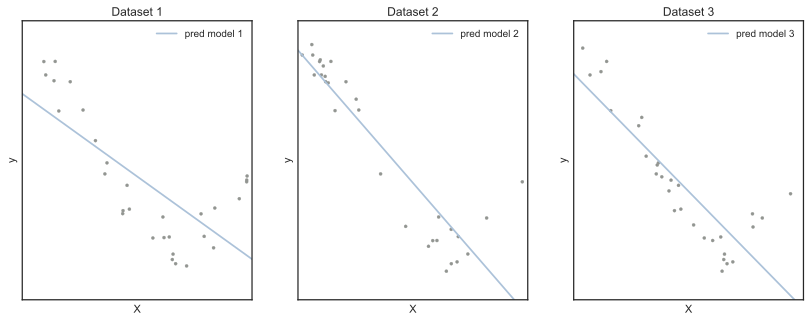

In [9]:
degree = 1
sample_set = 3

plt.figure(figsize=(14, 5))
with plt.style.context(("seaborn-white")):
    for i in range(sample_set):
        ax = plt.subplot(1, sample_set, i + 1)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([
            ("polynomial_featuers", polynomial_features),
            ("linear_regression", linear_regression)
        ])
        pipeline.fit(X_train[:, np.newaxis], y_train)

        X_line = np.linspace(0, 1, 100)
        plt.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), color=sample_color, label="pred model {}".format(i+1))
        plt.scatter(X_train, y_train, color=sample_point_color, s=10,)
        plt.xlabel("X")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim(-1.5, 1.5)
        plt.legend(loc="best")
        plt.title("Dataset {}".format(i+1))

plt.savefig('./images/bias-variance-1.png', bbox_inches='tight')

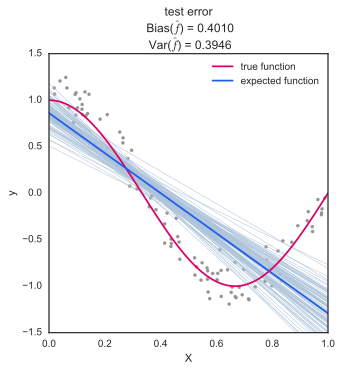

In [10]:
degree = 1
sample_set = 100

plt.figure(figsize=(5, 5))
with plt.style.context(("seaborn-white")):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    X_line = np.linspace(0, 1, 100)
    
    predict_lines = []
    test_predict_vals = []
    test_real_vals = []
    
    for i in range(sample_set):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)
        
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([
        ('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression)
        ])
        pipeline.fit(X_train[:, np.newaxis], y_train)
        
        test_predict_vals.append(pipeline.predict(X_test[:, np.newaxis]))
        test_real_vals.append(y_test)
        
        predict_lines.append(pipeline.predict(X_line[:, np.newaxis]))
        
        plt.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), color=sample_color, linewidth=0.5)
        
    expected_predict_line = np.mean(predict_lines, axis=0)
    
    plt.plot(X_line, true_func(X_line), color=true_color, label="true function")
    plt.plot(X_line, expected_predict_line, color=expected_color, label="expected function")
    
    plt.scatter(X, y, color=sample_point_color, s=10,)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("test error\n Bias({}) = {:.4f}\n Var({}) = {:.4f}".format(
        r"$\hat{f}$", bias(test_predict_vals, test_real_vals), 
        r"$\hat{f}$", variance(test_predict_vals)))
    
plt.savefig('./images/bias-variance-2.png', bbox_inches='tight')

### degree = 4

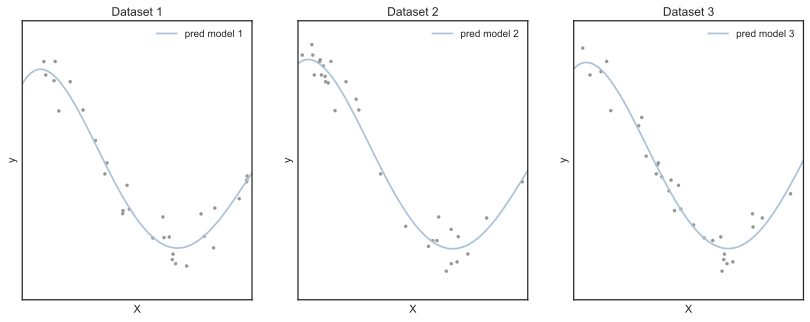

In [11]:
degree = 4
sample_set = 3

plt.figure(figsize=(14, 5))
with plt.style.context(("seaborn-white")):
    for i in range(sample_set):
        ax = plt.subplot(1, sample_set, i + 1)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([
            ("polynomial_featuers", polynomial_features),
            ("linear_regression", linear_regression)
        ])
        pipeline.fit(X_train[:, np.newaxis], y_train)

        X_line = np.linspace(0, 1, 100)
        plt.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), color=sample_color, label="pred model {}".format(i+1))
        plt.scatter(X_train, y_train, color=sample_point_color, s=10,)
        plt.xlabel("X")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim(-1.5, 1.5)
        plt.legend(loc="best")
        plt.title("Dataset {}".format(i+1))
        
plt.savefig('./images/bias-variance-3.png', bbox_inches='tight')

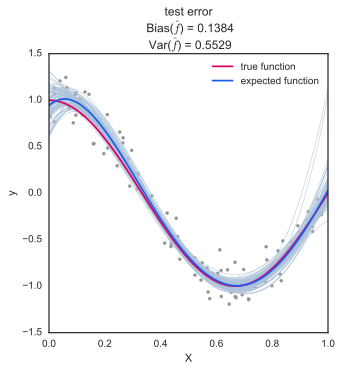

In [12]:
degree = 4
sample_set = 100

plt.figure(figsize=(5, 5))
with plt.style.context(("seaborn-white")):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    X_line = np.linspace(0, 1, 100)
    
    predict_lines = []
    test_predict_vals = []
    test_real_vals = []
    
    for i in range(sample_set):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)
        
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([
        ('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression)
        ])
        pipeline.fit(X_train[:, np.newaxis], y_train)
        
        test_predict_vals.append(pipeline.predict(X_test[:, np.newaxis]))
        test_real_vals.append(y_test)
        
        predict_lines.append(pipeline.predict(X_line[:, np.newaxis]))
        
        plt.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), color=sample_color, linewidth=0.5)
        
    expected_predict_line = np.mean(predict_lines, axis=0)
    
    plt.plot(X_line, true_func(X_line), color=true_color, label="true function")
    plt.plot(X_line, expected_predict_line, color=expected_color, label="expected function")
    
    plt.scatter(X, y, color=sample_point_color, s=10,)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("test error\n Bias({}) = {:.4f}\n Var({}) = {:.4f}".format(
        r"$\hat{f}$", bias(test_predict_vals, test_real_vals), 
        r"$\hat{f}$", variance(test_predict_vals)))
    
plt.savefig('./images/bias-variance-4.png', bbox_inches='tight')

### degree = 10

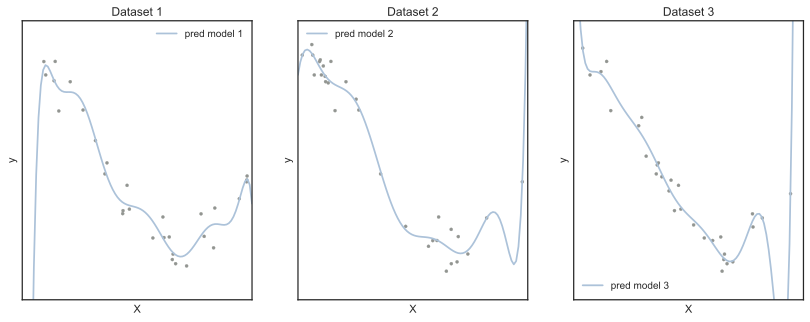

In [13]:
degree = 10
sample_set = 3

plt.figure(figsize=(14, 5))
with plt.style.context(("seaborn-white")):
    for i in range(sample_set):
        ax = plt.subplot(1, sample_set, i + 1)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([
            ("polynomial_featuers", polynomial_features),
            ("linear_regression", linear_regression)
        ])
        pipeline.fit(X_train[:, np.newaxis], y_train)

        X_line = np.linspace(0, 1, 100)
        plt.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), color=sample_color, label="pred model {}".format(i+1))
        plt.scatter(X_train, y_train, color=sample_point_color, s=10,)
        plt.xlabel("X")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim(-1.5, 1.5)
        plt.legend(loc="best")
        plt.title("Dataset {}".format(i+1))
        
plt.savefig('./images/bias-variance-5.png', bbox_inches='tight')

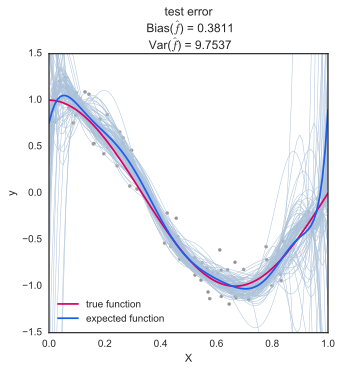

In [14]:
degree = 10
sample_set = 100

plt.figure(figsize=(5, 5))
with plt.style.context(("seaborn-white")):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    X_line = np.linspace(0, 1, 100)
    
    predict_lines = []
    test_predict_vals = []
    test_real_vals = []
    
    for i in range(sample_set):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)
        
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([
        ('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression)
        ])
        pipeline.fit(X_train[:, np.newaxis], y_train)
        
        test_predict_vals.append(pipeline.predict(X_test[:, np.newaxis]))
        test_real_vals.append(y_test)
        
        predict_lines.append(pipeline.predict(X_line[:, np.newaxis]))
        
        plt.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), color=sample_color, linewidth=0.5)
        
    expected_predict_line = np.mean(predict_lines, axis=0)
    
    plt.plot(X_line, true_func(X_line), color=true_color, label="true function")
    plt.plot(X_line, expected_predict_line, color=expected_color, label="expected function")
    
    plt.scatter(X, y, color=sample_point_color, s=10,)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("test error\n Bias({}) = {:.4f}\n Var({}) = {:.4f}".format(
        r"$\hat{f}$", bias(test_predict_vals, test_real_vals), 
        r"$\hat{f}$", variance(test_predict_vals)))
    
plt.savefig('./images/bias-variance-6.png', bbox_inches='tight')

### biases & variances in different degrees

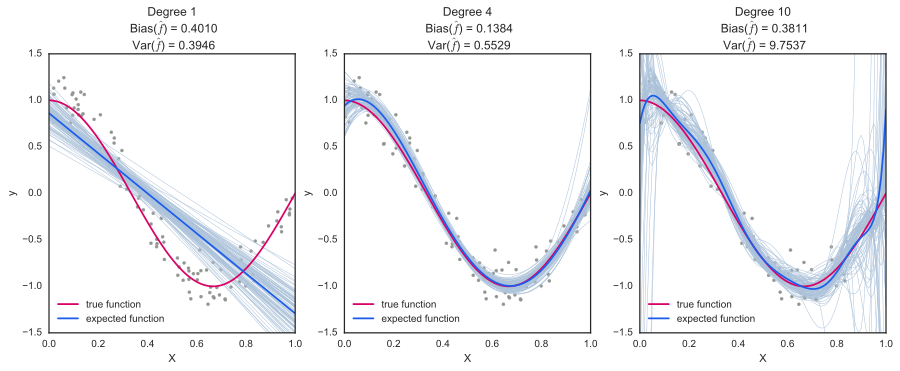

In [15]:
degrees = [1, 4, 10]

sample_set = 100

plt.figure(figsize=(15, 5))
with plt.style.context(("seaborn-white")):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

    X_line = np.linspace(0, 1, 100)
    
    for j in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), j + 1)

        predict_lines = []
        test_predict_vals = []
        test_real_vals = []

        for i in range(sample_set):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)

            polynomial_features = PolynomialFeatures(degree=degrees[j], include_bias=False)
            linear_regression = LinearRegression()
            pipeline = Pipeline([
            ('polynomial_features', polynomial_features),
            ('linear_regression', linear_regression)
            ])
            pipeline.fit(X_train[:, np.newaxis], y_train)

            predict_lines.append(pipeline.predict(X_line[:, np.newaxis]))
            test_predict_vals.append(pipeline.predict(X_test[:, np.newaxis]))
            test_real_vals.append(y_test)
            
            plt.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), color=sample_color, linewidth=0.5)

        expected_predict_line = np.mean(predict_lines, axis=0)

        plt.plot(X_line, true_func(X_line), color=true_color, label="true function")
        plt.plot(X_line, expected_predict_line, color=expected_color, label="expected function")

        plt.scatter(X, y, color=sample_point_color, s=10,)
        plt.xlabel("X")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-1.5, 1.5))
        plt.legend(loc="lower left")
        plt.title("Degree {}\n Bias({}) = {:.4f}\n Var({}) = {:.4f}".format(
            degrees[j], r"$\hat{f}$", bias(test_predict_vals, test_real_vals), 
            r"$\hat{f}$", variance(test_predict_vals)))
        
plt.savefig('./images/bias-variance-7.png', bbox_inches='tight')

### train & test error with model complexity

In [16]:
degree = range(0, 10)

train_biases = []
train_variances = []
test_biases = []
test_variances = []

for j in degree:
    sample_set = 100

    train_predict_vals = []
    train_real_vals = []
    test_predict_vals = []
    test_real_vals = []

    for i in range(sample_set):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=i)

        polynomial_features = PolynomialFeatures(degree=j+1, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([
        ('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression)
        ])

        pipeline.fit(X_train[:, np.newaxis], y_train)
        
        train_predict_vals.append(pipeline.predict(X_train[:, np.newaxis]))
        train_real_vals.append(y_train)
        
        test_predict_vals.append(pipeline.predict(X_test[:, np.newaxis]))
        test_real_vals.append(y_test)
        
    train_biases.append(bias(train_predict_vals, train_real_vals))
    train_variances.append(variance(train_predict_vals))
    test_biases.append(bias(test_predict_vals, test_real_vals))
    test_variances.append(variance(test_predict_vals))

### train error

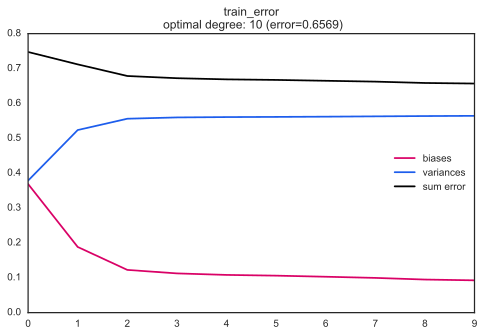

In [17]:
plt.figure(figsize=(8, 5))
with plt.style.context(("seaborn-white")):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    sum_error = [sum(x) for x in zip(train_biases, train_variances)]
    
    plt.plot(train_biases, color=true_color, label="biases")
    plt.plot(train_variances, color=expected_color, label="variances")
    plt.plot(sum_error, color='black', label="sum error")
    plt.legend(loc="best")
    plt.title("train_error\n optimal degree: {} (error={:.4f})".format(
        np.argmin(sum_error)+1, sum_error[np.argmin(sum_error)]))
    
plt.savefig('./images/bias-variance-8.png', bbox_inches='tight')

### test error

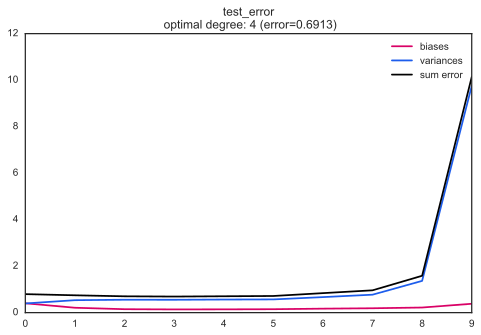

In [18]:
plt.figure(figsize=(8, 5))
with plt.style.context(("seaborn-white")):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    sum_error = [sum(x) for x in zip(test_biases, test_variances)]
    
    plt.plot(test_biases, color=true_color, label="biases")
    plt.plot(test_variances, color=expected_color, label="variances")
    plt.plot(sum_error, color='black', label="sum error")
    plt.legend(loc="best")
    plt.title("test_error\n optimal degree: {} (error={:.4f})".format(
        np.argmin(sum_error)+1, sum_error[np.argmin(sum_error)]))
    
plt.savefig('./images/bias-variance-9.png', bbox_inches='tight')